In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
news_df = pd.read_csv('news.csv')
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [54]:
news_df.shape

(6335, 4)

In [55]:
news_df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [56]:
news_df = news_df.drop(['title', 'Unnamed: 0'],axis=1)
news_df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [57]:
news_df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [58]:
count = news_df['label'].value_counts()
count

REAL    3171
FAKE    3164
Name: label, dtype: int64

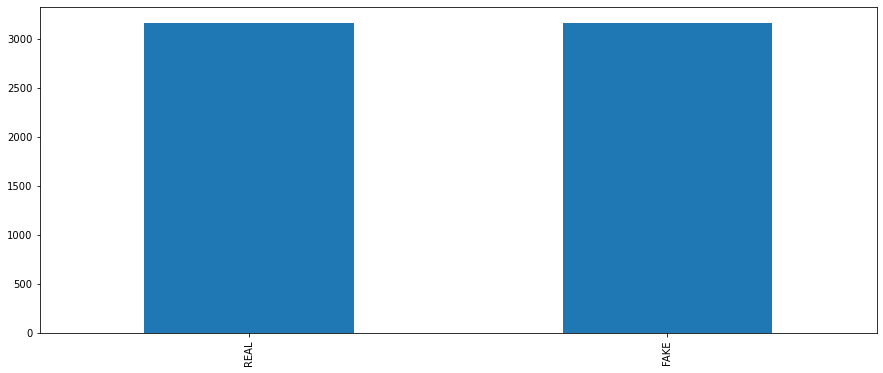

In [59]:
count.plot(kind='bar', figsize=(15,6))
plt.show()

In [60]:
#converting to lower case

news_df['text'] = news_df['text'].apply(lambda x: x.lower())
news_df['text'].head()

0    daniel greenfield, a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u.s. secretary of state john f. kerry said mon...
3    — kaydee king (@kaydeeking) november 9, 2016 t...
4    it's primary day in new york and front-runners...
Name: text, dtype: object

In [61]:
#removing punctuation

def string_preprocessing(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str=''.join(all_list)
    return clean_str

news_df['text'] = news_df['text'].apply(string_preprocessing)

In [62]:
#removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
news_df['text']=news_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [63]:
news_df.head()

,text,label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary state john f kerry said monday st...,REAL
3,— kaydee king kaydeeking november 9 2016 lesso...,FAKE
4,primary day new york frontrunners hillary clin...,REAL


In [66]:
import nltk

In [69]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [73]:
pip install wordcloud

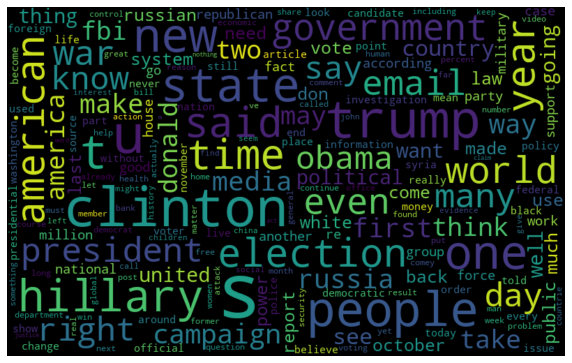

In [74]:
#word cloud for fake news
from wordcloud import WordCloud

fake_data = news_df[news_df['label'] == 'FAKE']
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width=800, height=500,
                         max_font_size=110,
                         collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

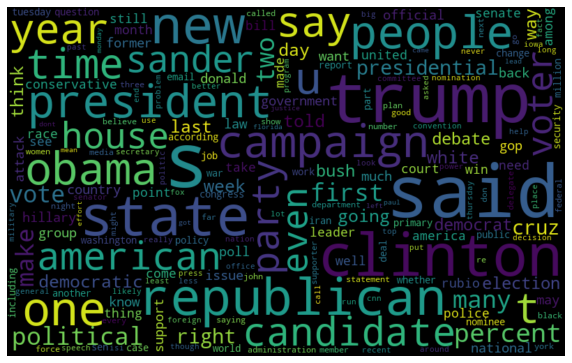

In [75]:
#word cloud for real news
from wordcloud import WordCloud

real_data = news_df[news_df['label'] == 'REAL']
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width=800, height=500,
                         max_font_size=110,
                         collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [77]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

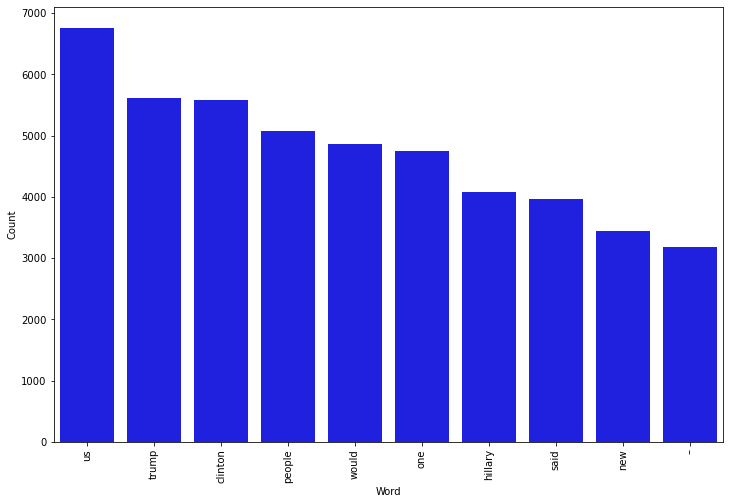

In [80]:
counter(news_df[news_df['label']=="FAKE"], "text", 10)

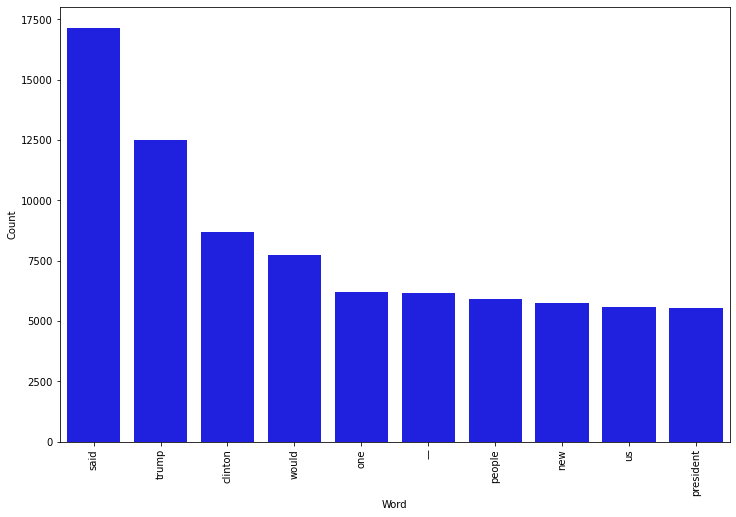

In [81]:
counter(news_df[news_df['label']=="REAL"], "text", 10)

### Modelling

In [82]:
#function to plot confusion matrix
import itertools

def plot_cm(cm, classes,
            normalize=False,
            title='Confusion Matrix',
           cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j ],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [85]:
#split the data
X = news_df['text']
y = news_df.label

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
dct = dict()

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

#Fitting the model
lr_model = pipe.fit(X_train, y_train)

#Accuracy
y_pred = lr_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 92.34%


Confusion matrix, without normalization


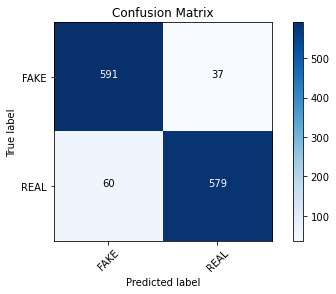

In [90]:
cm = confusion_matrix(y_test, y_pred)
plot_cm(cm, classes=["FAKE", "REAL"])

In [93]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

#Fitting the model
nb_model = pipe.fit(X_train, y_train)

#Accuracy
y_pred = nb_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Naive Bayes'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 83.5%


Confusion matrix, without normalization


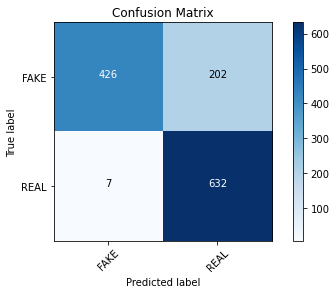

In [94]:
cm = confusion_matrix(y_test, y_pred)
plot_cm(cm, classes=["FAKE", "REAL"])

In [102]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                                 max_depth = 50,
                                                 splitter='best',
                                                 random_state=42))])

#Fitting the model
dt_model = pipe.fit(X_train, y_train)

#Accuracy
y_pred = dt_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 83.35%


Confusion matrix, without normalization


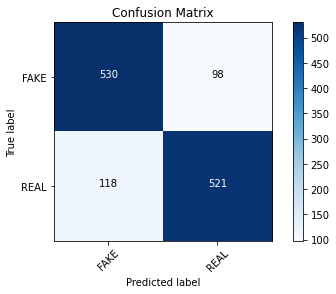

In [97]:
cm = confusion_matrix(y_test, y_pred)
plot_cm(cm, classes=['FAKE', 'REAL'])

In [98]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

#Fitting the model
rf_model = pipe.fit(X_train, y_train)

#Accuracy
y_pred = rf_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 90.84%


Confusion matrix, without normalization


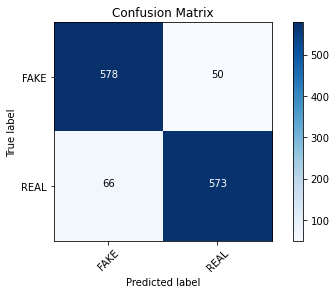

In [99]:
cm = confusion_matrix(y_test, y_pred)
plot_cm(cm, classes=['FAKE', 'REAL'])

In [100]:
from sklearn import svm

clf = svm.SVC(kernel="linear")

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

#Fitting the model
svm_model = pipe.fit(X_train, y_train)

#Accuracy
y_pred = svm_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 94.16%


Confusion matrix, without normalization


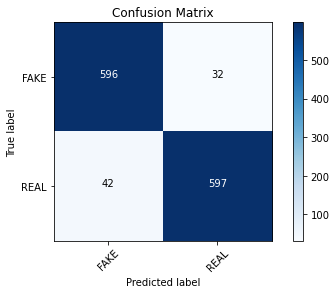

In [101]:
cm = confusion_matrix(y_test, y_pred)
plot_cm(cm, classes=['FAKE', 'REAL'])

In [103]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GBC)])

#Fitting the model
gbc_model = pipe.fit(X_train, y_train)

#Accuracy
y_pred = gbc_model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
dct['GBC'] = round(accuracy_score(y_test, y_pred)*100,2)

Accuracy: 89.11%


Confusion matrix, without normalization


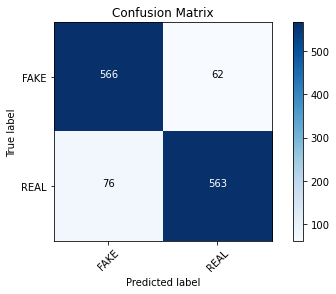

In [104]:
cm = confusion_matrix(y_test, y_pred)
plot_cm(cm, classes=['FAKE', 'REAL'])

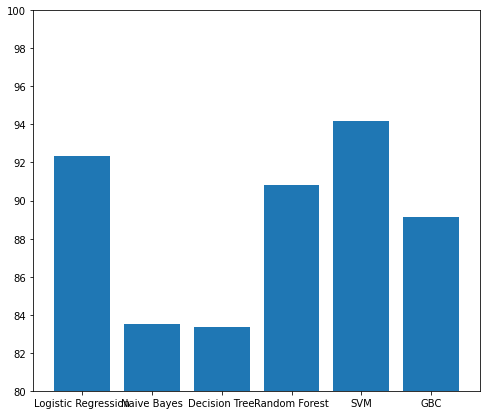

In [105]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100))
plt.show()

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()

## Making Predictions

In [115]:
def output_label(n):
    if n == "FAKE":
        return "Fake News"
    elif n == "REAL":
        return "Not Fake News"


def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(lambda x: x.lower())
    new_def_test['text'] = new_def_test['text'].apply(string_preprocessing)
    new_x_test = new_def_test["text"]
    #new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr_model.predict(new_x_test)
    pred_RF = rf_model.predict(new_x_test)
    pred_SVM = svm_model.predict(new_x_test)
    
    return print("\n\nLR Prediction: {} \nRF Prediction: {} \nSVM Prediction: {} ".format(output_label(pred_LR[0]),                                                                                                        
                                                                                          output_label(pred_RF[0]), 
                                                                                          output_label(pred_SVM[0])))

In [116]:
news = str(input())
manual_testing(news)

Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.


LR Prediction: Not Fake News 
RF Prediction: Not Fake News 
SVM Prediction: Not Fake News 


In [117]:
news = str(input())
manual_testing(news)

New Wikileaks email dumps have revealed massive corruption surrounding Hillary Clinton campaign chair John Podesta . In one email dated February 29, 2016, an article sent by Hillary advisor Sara Solow to Podesta and Hillaryâ€™s foreign policy advisor Jake Sullivan indicates that the Clinton campaign is considering House Speaker Paul Ryanâ€™s relative for the Supreme Court .  Ketanji Brown is the subject of the article. She is related to Paul Ryan by marriage and is a judge on the US District Court for the District of Columbia.  The email reads, â€œShe was confirmed by without any Republican opposition in the Senate not once, but *twice*. She was confirmed to her current position in 2013 by unanimous consent â€“ that is, without any stated opposition. She was also previously confirmed unanimously to a seat on the U.S. Sentencing Commission (where she became vice chair).â€  â€œHer family is impressive. She is married to a surgeon and has two young daughters. Her father is a retired lawy

In [120]:
#passive agressive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

In [121]:
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [124]:
pa_classifier = PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [125]:
y_pred=pa_classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.63%


Confusion matrix, without normalization


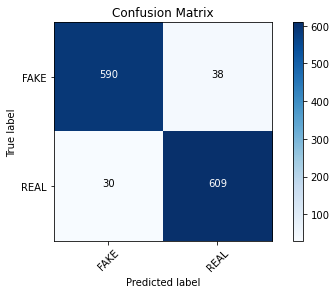

In [126]:
cm = confusion_matrix(y_test, y_pred)
plot_cm(cm, classes=['FAKE', 'REAL'])

In [133]:
def testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(lambda x: x.lower())
    new_def_test['text'] = new_def_test['text'].apply(string_preprocessing)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_PA = pa_classifier.predict(new_xv_test)

    
    return print("\n\nPrediction: {} ".format(output_label(pred_PA[0])))

In [134]:
news = str(input())
testing(news)

New Wikileaks email dumps have revealed massive corruption surrounding Hillary Clinton campaign chair John Podesta . In one email dated February 29, 2016, an article sent by Hillary advisor Sara Solow to Podesta and Hillaryâ€™s foreign policy advisor Jake Sullivan indicates that the Clinton campaign is considering House Speaker Paul Ryanâ€™s relative for the Supreme Court .  Ketanji Brown is the subject of the article. She is related to Paul Ryan by marriage and is a judge on the US District Court for the District of Columbia.  The email reads, â€œShe was confirmed by without any Republican opposition in the Senate not once, but *twice*. She was confirmed to her current position in 2013 by unanimous consent â€“ that is, without any stated opposition. She was also previously confirmed unanimously to a seat on the U.S. Sentencing Commission (where she became vice chair).â€  â€œHer family is impressive. She is married to a surgeon and has two young daughters. Her father is a retired lawy

In [135]:
news = str(input())
testing(news)

  (CNN) Fifty years ago this weekend, a 25-year-old John Lewis was beaten so badly by Alabama state troopers that they fractured his skull.  Lewis calls the Edmund Pettus Bridge -- where the troopers and and a group of white men deputized into a posse by the sheriff attacked hundreds of peaceful protesters on Bloody Sunday, March 7, 1965 -- an "almost holy place."  Now a Democratic U.S. congressman, Lewis is returning to Selma -- as he has nearly every year since that historic march -- to remember the fight for voting rights and to push voters across the country to participate in the political process. He also wants people to continue to speak up about the problems of racial injustice and poverty that persist in American society.  "It is important to come back to remember Selma," Lewis told CNN in an interview at First Baptist Church. "The vote is powerful. It is the most powerful nonviolent tool we have in a democratic society and I don't want people to forget that people paid a price